# ***Ch11:Cross-Validation***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

# the sales of an online retailer in the United Kingdom
# 3 years of daily sales amounts
df = pd.read_csv('../data/online_retail.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

In [2]:
df

,ds,y
0,2009-12-01,3106.000000
1,2009-12-02,3254.000000
2,2009-12-03,2951.000000
3,2009-12-04,2529.000000
4,2009-12-05,2644.541758
...,...,...
1099,2012-12-04,2726.403434
1100,2012-12-05,4528.532962
1101,2012-12-06,6125.495419
1102,2012-12-07,3476.642731


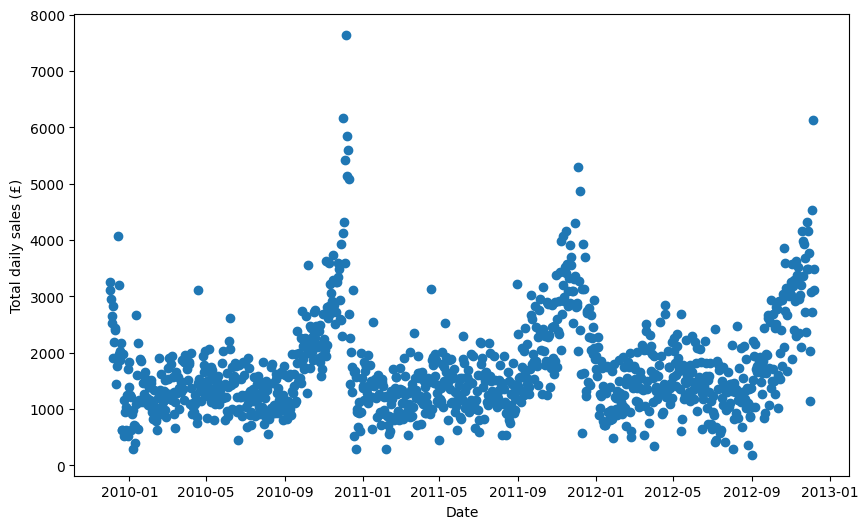

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'])
plt.xlabel('Date')
plt.ylabel('Total daily sales (£)')
plt.show()

## *Forward-chaining cross-validation*(Rolling-origin CV)

00:07:05 - cmdstanpy - INFO - Chain [1] start processing
00:07:06 - cmdstanpy - INFO - Chain [1] done processing


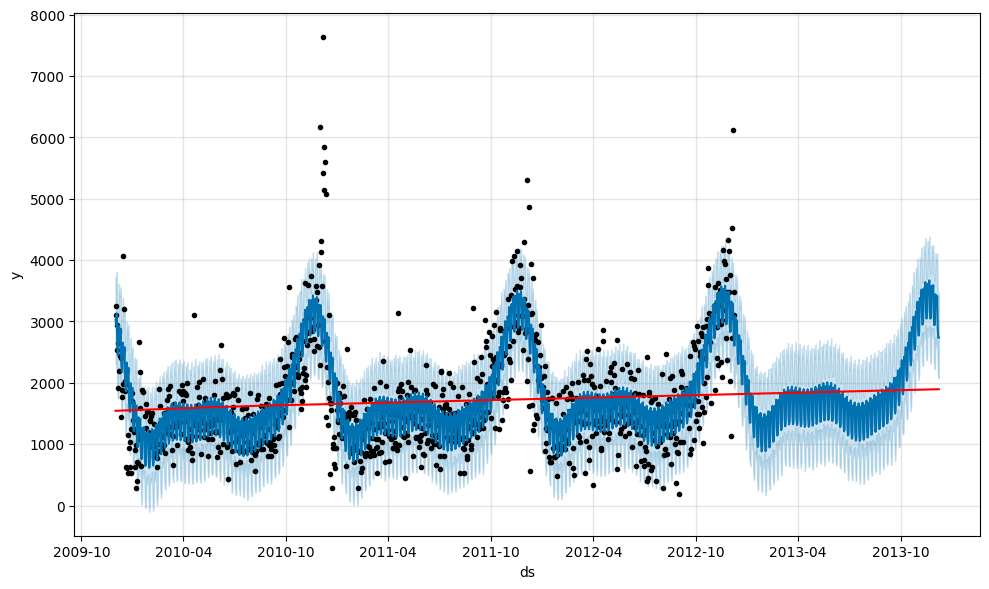

In [4]:
# make trained model first
model = Prophet(yearly_seasonality=4)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

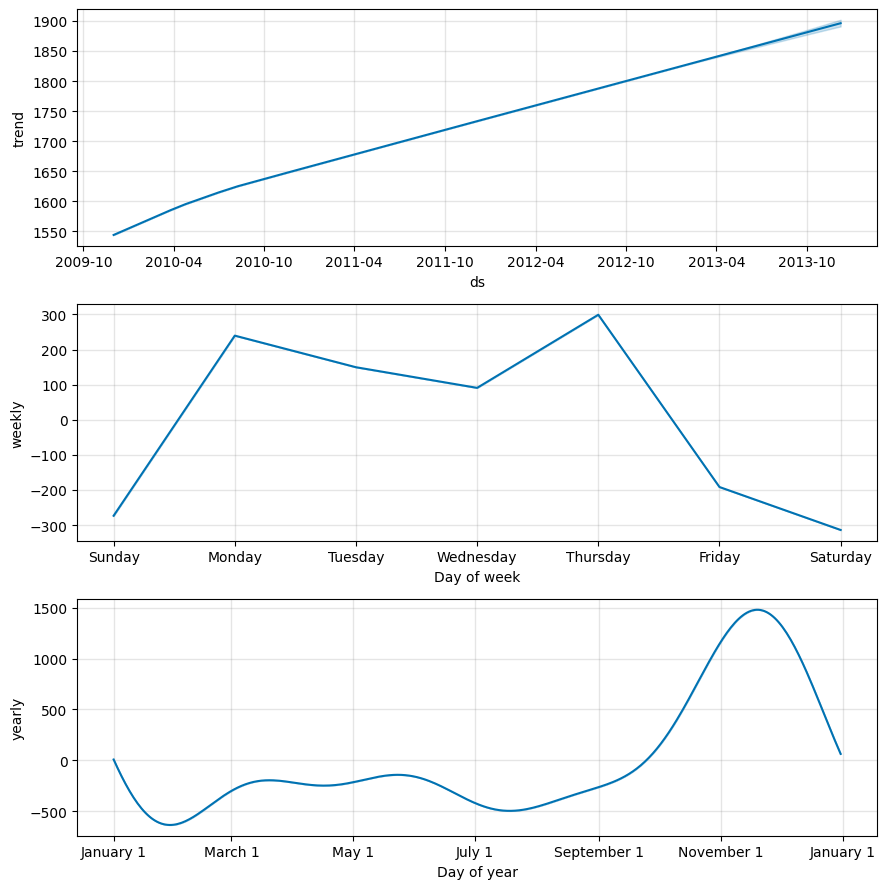

In [5]:
fig2 = model.plot_components(forecast)
plt.show()

In [6]:
# Load built-in cross-valiation tool
from prophet.diagnostics import cross_validation

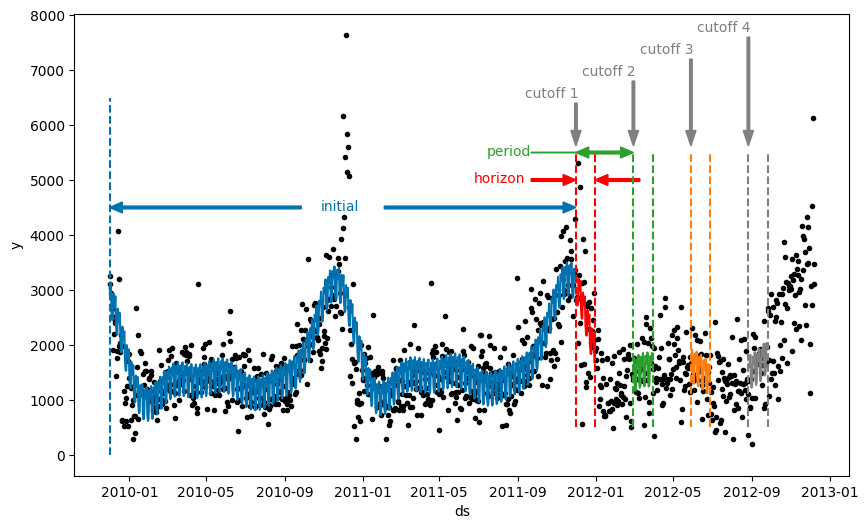

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], 'k.')
plt.vlines([df['ds'][730], df['ds'][760]], 500, 5500, colors='r', linestyles='--')
plt.vlines([df['ds'][820], df['ds'][850]], 500, 5500, colors='tab:green', linestyles='--')
plt.vlines([df['ds'][910], df['ds'][940]], 500, 5500, colors='tab:orange', linestyles='--')
plt.vlines([df['ds'][1000], df['ds'][1030]], 500, 5500, colors='gray', linestyles='--')
plt.vlines([df['ds'][0]], 0, 6500, colors='#0072B2', linestyles='--')

plt.plot(forecast[forecast['ds'] < df['ds'][730]]['ds'],
         forecast[forecast['ds'] < df['ds'][730]]['yhat'],
         c='#0072B2')

plt.plot(forecast[(forecast['ds'] < df['ds'][760]) &
                  (forecast['ds'] > df['ds'][730])]['ds'],
         forecast[(forecast['ds'] < df['ds'][760]) &
                  (forecast['ds'] > df['ds'][730])]['yhat'], c='r')

plt.plot(forecast[(forecast['ds'] < df['ds'][850]) &
                  (forecast['ds'] > df['ds'][820])]['ds'],
         forecast[(forecast['ds'] < df['ds'][850]) &
                  (forecast['ds'] > df['ds'][820])]['yhat'], c='tab:green')

plt.plot(forecast[(forecast['ds'] < df['ds'][940]) &
                  (forecast['ds'] > df['ds'][910])]['ds'],
         forecast[(forecast['ds'] < df['ds'][940]) &
                  (forecast['ds'] > df['ds'][910])]['yhat'], c='tab:orange')

plt.plot(forecast[(forecast['ds'] < df['ds'][1030]) &
                  (forecast['ds'] > df['ds'][1000])]['ds'],
         forecast[(forecast['ds'] < df['ds'][1030]) &
                  (forecast['ds'] > df['ds'][1000])]['yhat'], c='gray')

plt.arrow(df['ds'][660], 5000, 50, 0, width=50, head_width=200, head_length=20, color='r')
plt.arrow(df['ds'][830], 5000, -50, 0, width=50, head_width=200, head_length=20, color='r')
plt.text(df['ds'][570], 4950, 'horizon', color='r')

plt.arrow(df['ds'][660], 5500, 140, 0, width=10, head_width=200, head_length=20, color='tab:green')
plt.arrow(df['ds'][800], 5500, -50, 0, width=50, head_width=200, head_length=20, color='tab:green')
plt.text(df['ds'][590], 5450, 'period', color='tab:green')

plt.arrow(df['ds'][730], 6400, 0, -500, width=4, head_width=16, head_length=280, color='gray')
plt.text(df['ds'][650], 6500, 'cutoff 1', color='gray')

plt.arrow(df['ds'][820], 6800, 0, -900, width=4, head_width=16, head_length=280, color='gray')
plt.text(df['ds'][740], 6900, 'cutoff 2', color='gray')

plt.arrow(df['ds'][910], 7200, 0, -1300, width=4, head_width=16, head_length=280, color='gray')
plt.text(df['ds'][830], 7300, 'cutoff 3', color='gray')

plt.arrow(df['ds'][1000], 7600, 0, -1700, width=4, head_width=16, head_length=280, color='gray')
plt.text(df['ds'][920], 7700, 'cutoff 4', color='gray')

plt.arrow(df['ds'][300], 4500, -280, 0, width=50, head_width=200, head_length=20, color='#0072B2')
plt.arrow(df['ds'][430], 4500, 280, 0, width=50, head_width=200, head_length=20, color='#0072B2')
plt.text(df['ds'][330], 4450, 'initial', color='#0072B2')

plt.xlabel('ds')
plt.ylabel('y')

plt.show()

In [8]:
# set up CV
# pandas' Timedelta format, e.g) '5 days', '3 hours', or '10 seconds'

df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='730 days')

  0%|          | 0/10 [00:00<?, ?it/s]

00:27:13 - cmdstanpy - INFO - Chain [1] start processing
00:27:13 - cmdstanpy - INFO - Chain [1] done processing
00:27:13 - cmdstanpy - INFO - Chain [1] start processing
00:27:13 - cmdstanpy - INFO - Chain [1] done processing
00:27:13 - cmdstanpy - INFO - Chain [1] start processing
00:27:13 - cmdstanpy - INFO - Chain [1] done processing
00:27:13 - cmdstanpy - INFO - Chain [1] start processing
00:27:13 - cmdstanpy - INFO - Chain [1] done processing
00:27:14 - cmdstanpy - INFO - Chain [1] start processing
00:27:14 - cmdstanpy - INFO - Chain [1] done processing
00:27:14 - cmdstanpy - INFO - Chain [1] start processing
00:27:14 - cmdstanpy - INFO - Chain [1] done processing
00:27:14 - cmdstanpy - INFO - Chain [1] start processing
00:27:14 - cmdstanpy - INFO - Chain [1] done processing
00:27:14 - cmdstanpy - INFO - Chain [1] start processing
00:27:14 - cmdstanpy - INFO - Chain [1] done processing
00:27:15 - cmdstanpy - INFO - Chain [1] start processing
00:27:15 - cmdstanpy - INFO - Chain [1]

In [10]:
df

,ds,y
0,2009-12-01,3106.000000
1,2009-12-02,3254.000000
2,2009-12-03,2951.000000
3,2009-12-04,2529.000000
4,2009-12-05,2644.541758
...,...,...
1099,2012-12-04,2726.403434
1100,2012-12-05,4528.532962
1101,2012-12-06,6125.495419
1102,2012-12-07,3476.642731


In [11]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-12-15,2801.040145,2043.706067,3554.358393,3702.986147,2011-12-14
1,2011-12-16,2352.144032,1640.709387,3088.302003,1229.263629,2011-12-14
2,2011-12-17,2182.193515,1436.877366,2920.047866,1325.415023,2011-12-14
3,2011-12-18,2165.280065,1465.434514,2843.740922,2739.454215,2011-12-14
4,2011-12-19,2635.974563,1879.023892,3358.239648,2699.823386,2011-12-14
...,...,...,...,...,...,...
895,2012-12-04,3108.887035,2449.180114,3822.816753,2726.403434,2012-09-09
896,2012-12-05,3024.087806,2369.138265,3682.591610,4528.532962,2012-09-09
897,2012-12-06,3174.332561,2573.164387,3819.165788,6125.495419,2012-09-09
898,2012-12-07,2673.985460,1990.897227,3319.539417,3476.642731,2012-09-09


In [12]:
df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='730 days',
                         parallel='processes')

00:38:50 - cmdstanpy - INFO - Chain [1] start processing
00:38:50 - cmdstanpy - INFO - Chain [1] start processing
00:38:50 - cmdstanpy - INFO - Chain [1] start processing
00:38:50 - cmdstanpy - INFO - Chain [1] start processing
00:38:50 - cmdstanpy - INFO - Chain [1] done processing
00:38:50 - cmdstanpy - INFO - Chain [1] done processing
00:38:50 - cmdstanpy - INFO - Chain [1] done processing
00:38:50 - cmdstanpy - INFO - Chain [1] done processing
00:38:51 - cmdstanpy - INFO - Chain [1] start processing
00:38:51 - cmdstanpy - INFO - Chain [1] start processing
00:38:51 - cmdstanpy - INFO - Chain [1] start processing
00:38:51 - cmdstanpy - INFO - Chain [1] start processing
00:38:51 - cmdstanpy - INFO - Chain [1] done processing
00:38:51 - cmdstanpy - INFO - Chain [1] done processing
00:38:51 - cmdstanpy - INFO - Chain [1] done processing
00:38:51 - cmdstanpy - INFO - Chain [1] done processing
00:38:51 - cmdstanpy - INFO - Chain [1] start processing
00:38:51 - cmdstanpy - INFO - Chain [1]

In [13]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-12-15,2801.040145,2071.095209,3591.047379,3702.986147,2011-12-14
1,2011-12-16,2352.144032,1626.096820,3069.284016,1229.263629,2011-12-14
2,2011-12-17,2182.193515,1503.602659,2927.716665,1325.415023,2011-12-14
3,2011-12-18,2165.280065,1448.493374,2836.998969,2739.454215,2011-12-14
4,2011-12-19,2635.974563,1952.337808,3366.473981,2699.823386,2011-12-14
...,...,...,...,...,...,...
895,2012-12-04,3108.887035,2430.350330,3754.579266,2726.403434,2012-09-09
896,2012-12-05,3024.087806,2348.732763,3692.082333,4528.532962,2012-09-09
897,2012-12-06,3174.332561,2531.724069,3810.784325,6125.495419,2012-09-09
898,2012-12-07,2673.985460,2035.710180,3333.398449,3476.642731,2012-09-09
